# Vim2

In [10]:
%%time
import tables

f = tables.open_file('../data/crcns-vim2/Stimuli.mat')
Xv = f.get_node('/sv')[:]
Xt = f.get_node('/st')[:]
f.close()

Wall time: 36.2 s


In [25]:
h5file.close()

In [11]:
%%time
h5file = tables.open_file("../data/crcns-vim2/derived/Stimuli.mat", mode="w", title="Stimulus file")
h5file.create_array('/', 'sv', Xv, "Validation stimulus")
h5file.create_array('/', 'st', Xt, "Training stimulus")
h5file.flush()
h5file.close()

Wall time: 44.8 s


In [2]:
%%time
import tables

f = tables.open_file('../data/crcns-vim2/derived/Stimuli.mat')
Xv = f.get_node('/sv')[:]
Xt = f.get_node('/st')[:]
f.close()

Wall time: 3.43 s


In [116]:
%%time
import numpy as np
import tables

def get_max_r2(all_responses):
    all_responses = (all_responses - all_responses.mean(2, keepdims=True)) / all_responses.std(2, keepdims=True)

    p_r_bar = (np.nanmean(all_responses, axis=1) ** 2).mean(1)
    bar_p_r = (np.nanmean(all_responses ** 2, axis=1)).mean(1)
    p_r_bar

    N = (~np.isnan(all_responses).any(axis=2)).sum(axis=1)
    p_mu = 1 / (N - 1) * (N * p_r_bar - bar_p_r)
    max_r2 = p_mu / p_r_bar
    
    return max_r2

for subject in [1, 2, 3]:
    print(f"Subject {subject}")
    f = tables.open_file(f'../data/crcns-vim2/VoxelResponses_subject{subject}.mat')
    Yv = f.get_node('/rv')[:]
    Yt = f.get_node('/rt')[:]
    Ya = f.get_node('/rva')[:]
    max_r2 = get_max_r2(Ya)
    
    nodes = f.list_nodes('/roi')
    rois = {}
    for node in nodes:
        rois[node.name] = node[:]
    f.close()
    
    mask = (~np.isnan(Yv)).all(1) & (~np.isnan(Yt)).all(1)
    
    h5file = tables.open_file(f'../data/crcns-vim2/derived/VoxelResponses_subject{subject}.mat', mode="w", title="Response file")
    h5file.create_array('/', 'rv', Yv, "Validation responses")
    h5file.create_array('/', 'rt', Yt, "Training responses")
    h5file.create_array('/', 'maxr2', max_r2, "Max R^2 for this dataset")
    h5file.create_array('/', 'mask', mask, "Master mask")
    groups = h5file.create_group('/', 'roi')
    for key, node in rois.items():
        h5file.create_array(groups, key, node, "ROI")
    h5file.flush()
    h5file.close()

Subject 1


<timed exec>:7: RuntimeWarning: Mean of empty slice
<timed exec>:8: RuntimeWarning: Mean of empty slice
/home/pmin/anaconda3/envs/py3/lib/python3.8/site-packages/tables/attributeset.py:308: DataTypeWarning: Unsupported type for attribute 'MATLAB_fields' in node 'roi'. Offending HDF5 class: 9
  value = self._g_getattr(self._v_node, name)


Subject 2
Subject 3
CPU times: user 1min 18s, sys: 19.6 s, total: 1min 38s
Wall time: 3min 8s


In [7]:
Yt.shape

(73728, 7200)

In [7]:
%%time

import tables
f = tables.open_file(f'../data/crcns-vim2/derived/VoxelResponses_subject{subject}.mat')
Yv = f.get_node('/rv')[:]
Yt = f.get_node('/rt')[:]
nodes = f.list_nodes('/roi')
rois = {}
for node in nodes:
    rois[node.name] = node[:]
f.close()

Wall time: 1.74 s


# pvc-1

In [3]:
import matplotlib
import matplotlib.image
import numpy as np
import os
import tables

root = '../data/crcns-ringach-data'
movie_info = {}
h5file = tables.open_file(f'../data/crcns-ringach-data/derived/movies.h5', 'w')

for i in range(30):
    for j in range(4):
        print(i, j)
        root_ = os.path.join(root, "movie_frames", f"movie{j:03}_{i:03}.images")
        with open(os.path.join(root_, 'nframes'), 'r') as f:
            nframes = int(f.read())
        
            ims = []
            for frame in range(nframes):
                im_name = f'movie{j:03}_{i:03}_{frame:03}.jpeg'
                the_im = matplotlib.image.imread(os.path.join(root_, im_name))
        
                assert the_im.shape[0] == 240
                the_im = the_im.reshape((120, 2, 160, 2, 3)).mean(3).mean(1)
                the_im = the_im[8:, 24:136, :].transpose((2, 0, 1))
                ims.append(the_im.astype(np.uint8))
        
            m = np.stack(ims, axis=0)
            h5file.create_array('/', f'movie{j:03}_{i:03}', m, "Movie")

h5file.close()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3
10 0
10 1
10 2
10 3
11 0
11 1
11 2
11 3
12 0
12 1
12 2
12 3
13 0
13 1
13 2
13 3
14 0
14 1
14 2
14 3
15 0
15 1
15 2
15 3
16 0
16 1
16 2
16 3
17 0
17 1
17 2
17 3
18 0
18 1
18 2
18 3
19 0
19 1
19 2
19 3
20 0
20 1
20 2
20 3
21 0
21 1
21 2
21 3
22 0
22 1
22 2
22 3
23 0
23 1
23 2
23 3
24 0
24 1
24 2
24 3
25 0
25 1
25 2
25 3
26 0
26 1
26 2
26 3
27 0
27 1
27 2
27 3
28 0
28 1
28 2
28 3
29 0
29 1
29 2
29 3


In [2]:
h5file.close()

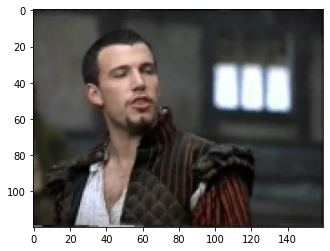

In [27]:
the_im = matplotlib.image.imread(os.path.join(root_, im_name))
plt.imshow(the_im)
the_im = the_im.reshape((120, 2, 160, 2, 3)).mean(3).mean(1).astype(np.uint8)
#the_im = the_im[8:, 24:136, :].astype(np.uint8)
plt.imshow(the_im)

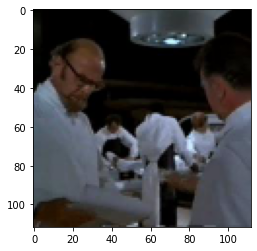

In [4]:
import matplotlib.pyplot as plt
h5file = tables.open_file(f'../data/crcns-ringach-data/derived/movies.h5', 'r')
plt.imshow(h5file.get_node('/movie000_000')[:][10, :, :, :].transpose((1, 2, 0)))